In [84]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Hi

In [85]:
# reading csv files
df =  pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)
df2 = pd.read_csv('adult.test', sep=",", header=None, skipinitialspace=True)

# Join the data and test files together
df = pd.concat([df, df2])

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,44,Private,438696,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K.
1,39,Private,105803,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K.
2,42,Private,245565,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,12,England,<=50K
3,26,Private,311743,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,39,United-States,<=50K.
4,19,Private,237433,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Female,4416,0,40,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,34,State-gov,595000,Masters,14,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,United-States,>50K
48838,17,?,110998,Some-college,10,Never-married,?,Own-child,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
48839,30,Private,302438,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
48840,45,Private,288437,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Other,Male,4064,0,40,United-States,<=50K


In [86]:
# Find X and y values - selecting only important features for X
X = df.iloc[:, [0, 4, 6, 8, 9, 12, 13]]
y = df.iloc[:, [14]]
X.columns = ['Age', 'Education', 'Occupation', 'Race', 'Sex', 'Hours-per-week', 'Native-country']
y.columns = ['Income']
print(y)



       Income
0      <=50K.
1      <=50K.
2       <=50K
3      <=50K.
4      <=50K.
...       ...
48837    >50K
48838   <=50K
48839   <=50K
48840   <=50K
48841  <=50K.

[48842 rows x 1 columns]


In [87]:
# Convert categorical data to numerical
mapping_dict = {'Male' : '0','Female' : '1'}
X['Sex'] = (X['Sex'].map(mapping_dict))
mapping_dict = {'White' : '0','Asian-Pac-Islander' : '1', 'Amer-Indian-Eskimo' : '2', 'Other' : '3', 'Black' : '4'}
X['Race'] = (X['Race'].map(mapping_dict))
# Set countries to numerical value, grouped countries into continents.
# North America = 0, South America = 1, Asia = 2, Europe = 3, 
mapping_dict = {'United-States' : '0', 'Cambodia' : '2', 'England' : '3', 'Puerto-Rico' : '0', 'Canada' : '0', 'Germany' : '3', 'Outlying-US(Guam-USVI-etc)' : '0', 'India' : '2', 'Japan' : '2', 'Greece' : '3', 'South' : '??????????', 'China' : '2', 'Cuba' : '0', 'Iran' : '2', 'Honduras' : '0', 'Philippines' : '2', 'Italy' : '3', 'Poland' : '3', 'Jamaica' : '0', 'Vietnam' : '2', 'Mexico' : '0', 'Portugal' : '3', 'Ireland' : '3', 'France' : '3', 'Dominican-Republic' : '0', 'Laos' : '2', 'Ecuador' : '1', 'Taiwan' : '2', 'Haiti' : '0', 'Columbia' : '1', 'Hungary' : '3', 'Guatemala' : '0', 'Nicaragua' : '0', 'Scotland' : '3', 'Thailand' : '2', 'Yugoslavia' : '3', 'El-Salvador' : '0', 'Trinadad&Tobago' : '1', 'Peru' : '1', 'Hong' : '????????', 'Holand-Netherlands' : '3', '?' : '?'}
X['Native-country'] = (X['Native-country'].map(mapping_dict))
# Convert y into numerical: <50k = 0, >50k = 1
mapping_dict = {'<=50K' : '0', '>50K' : '1', '<=50K.' : '0', '>50K.' : '1'}
y['Income'] = (y['Income'].map(mapping_dict))


<ipython-input-87-8ad0a91bac10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = (X['Sex'].map(mapping_dict))
<ipython-input-87-8ad0a91bac10>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Race'] = (X['Race'].map(mapping_dict))
<ipython-input-87-8ad0a91bac10>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [88]:
y.isnull().sum()

Income    0
dtype: int64

In [89]:
X

,Age,Education,Occupation,Race,Sex,Hours-per-week,Native-country
0,44,13,Sales,0,0,45,0
1,39,10,Sales,0,0,40,0
2,42,13,Prof-specialty,0,1,12,3
3,26,9,Other-service,0,1,39,0
4,19,9,Prof-specialty,0,1,40,0
...,...,...,...,...,...,...,...
48837,34,14,Prof-specialty,4,1,40,0
48838,17,10,?,1,1,40,2
48839,30,9,Machine-op-inspct,0,0,40,0
48840,45,9,Transport-moving,3,0,40,0


In [90]:
# Replace all of ? with None
X = X.replace(['?'], [None])
# Drop all rows with None in them
X = X.dropna(axis=0)

# Check no None values remain
X.isnull().sum()

In [91]:
# print(X.head(50))
X.isnull().sum()

Age                  0
Education            0
Occupation        2809
Race                 0
Sex                  0
Hours-per-week       0
Native-country     857
dtype: int64

# Plot a histogram of 'medv' in y
fig = plt.figure(figsize=(13,7))
plt.hist(X['Age'], bins=50, range = (0, 100))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

In [103]:
X

,Age,Education,Occupation,Race,Sex,Hours-per-week,Native-country
0,44,13,Sales,0,0,45,0
1,39,10,Sales,0,0,40,0
2,42,13,Prof-specialty,0,1,12,3
3,26,9,Other-service,0,1,39,0
4,19,9,Prof-specialty,0,1,40,0
...,...,...,...,...,...,...,...
48837,34,14,Prof-specialty,4,1,40,0
48838,17,10,None,1,1,40,2
48839,30,9,Machine-op-inspct,0,0,40,0
48840,45,9,Transport-moving,3,0,40,0


In [100]:
print(X['Age'].values)
y['Income'].values

[44 39 42 ... 30 45 30]


array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

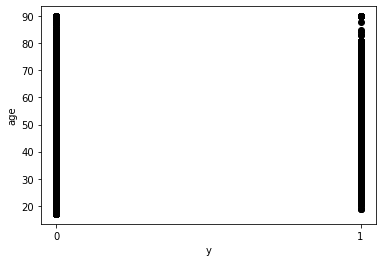

In [114]:
plt.scatter(y['Income'].values, X['Age'].values, color='black')
plt.xlabel("y")
plt.ylabel("age")
plt.show()

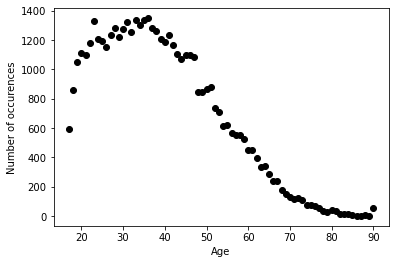

In [107]:
X['Age'].value_counts().values
X['Age'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.scatter(X['Age'].value_counts().index.tolist(), X['Age'].value_counts().values, color='black')
plt.xlabel("Age")
plt.ylabel("Number of occurences")
plt.show()

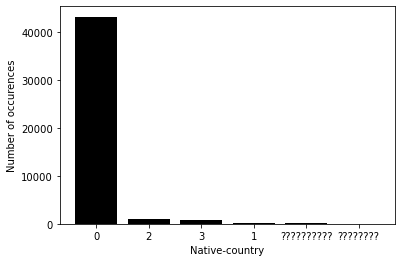

In [80]:
X['Native-country'].value_counts().values
X['Native-country'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Native-country'].value_counts().index.tolist(), X['Native-country'].value_counts().values, color='black')
plt.xlabel("Native-country")
plt.ylabel("Number of occurences")
plt.show()

# Compare to graph of before you formed the continent categories.

# Shows that feature scaling is required?

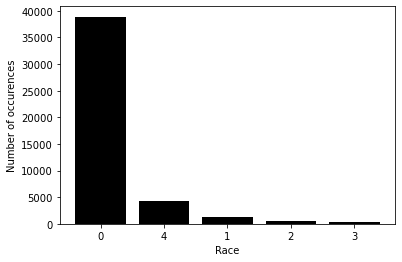

In [53]:
X['Race'].value_counts().values
X['Race'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Race'].value_counts().index.tolist(), X['Race'].value_counts().values, color='black')
plt.xlabel("Race")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

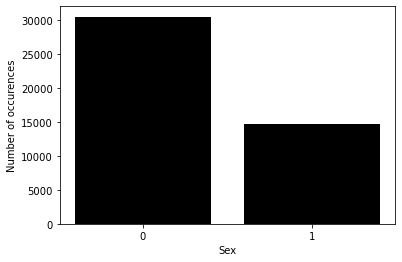

In [54]:
X['Sex'].value_counts().values
X['Sex'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Sex'].value_counts().index.tolist(), X['Sex'].value_counts().values, color='black')
plt.xlabel("Sex")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

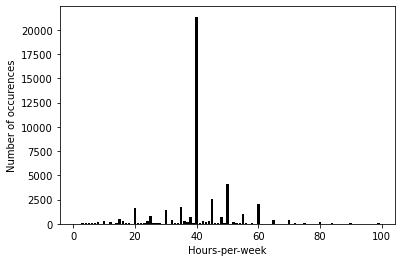

In [55]:
X['Hours-per-week'].value_counts().values
X['Hours-per-week'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Hours-per-week'].value_counts().index.tolist(), X['Hours-per-week'].value_counts().values, color='black')
plt.xlabel("Hours-per-week")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required??????

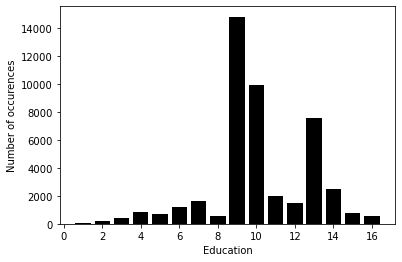

In [56]:
X['Education'].value_counts().values
X['Education'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Education'].value_counts().index.tolist(), X['Education'].value_counts().values, color='black')
plt.xlabel("Education")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?